<a href="https://colab.research.google.com/github/suryagokul/Time-Series-ForeCasting/blob/main/Introduction_to_Time_series_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting

>> [**Auto Regressive Model**](#scrollTo=bzDt4jCDiqte)

>> [**Arima Model**](#scrollTo=F-bP2mG4ihRG)

In [7]:
import pandas as pd

In [19]:
sales = pd.read_csv("sales-cars.csv")

sales[:5]

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [20]:
sales.Month[0]                     

'2016-01'

In [21]:
type(sales.Month[0])        

str

We need to convert str to datetime to do time series forecasting or analysis...

In [22]:
import datetime

In [24]:
sales.Month = sales.Month.apply(lambda x : datetime.datetime.strptime(x,'%Y-%m'))

In [28]:
sales[:5]                        #  There is no date in actual dataset format but it places 01 at all places...

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [26]:
type(sales.Month[0])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
sales.index = sales.Month                               # Placing Month Column as index...

In [32]:
sales.drop('Month',axis=1,inplace=True)

In [33]:
sales[:6]

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169


In [34]:
import matplotlib.pyplot as plt

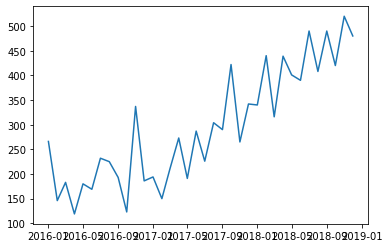

In [35]:
plt.plot(sales)

By looking distribution,We can say that the data is not **"Stationary"**.

> Stationary is nothing but over different period of time mean,variance and co-variance should be same...


> But in this distribution,the data is peak at some place and low at another place.It may be because of  randomness of the data.

We can also know whether the data is stationary or not by using **AutoCorrelation plot** as shown below..

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

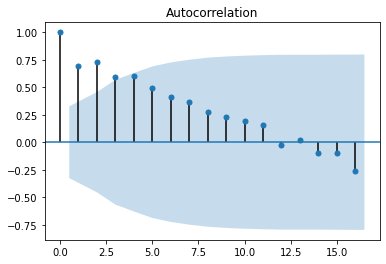

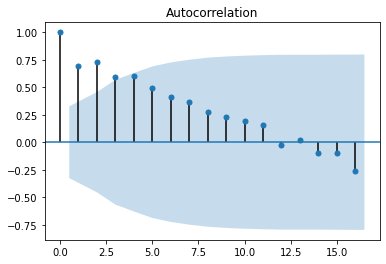

In [45]:
plot_acf(sales)

**`Plot says that the data is not Stationary because lags are slowly destructive but it must be die at a time in very fast manner...`**

> `It shows correlation between two series.One is sales and another one is sales data after shifting which is shown below.`




In [64]:
print(sales[:4])

print()

print("After One Shift ")
print()

print(sales.shift(1)[:4])

            Sales
Month            
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119

After One Shift 

            Sales
Month            
2016-01-01    NaN
2016-02-01  266.0
2016-03-01  146.0
2016-04-01  183.0


> `When we compare 266 with 266 it is obviously high correlation as shown in above plot`

> `When we compare 146 with 266 it has 70% correlated as shown in above plot i.e second lag...`

*Converting into Stationary data to use different time series models.

Technique:*

              "Integrating" or "Differencing" previous sales with current one.

In [50]:
sales_diff = sales.diff(periods=1)             # Differencing

sales_diff = sales_diff[1:]

print(sales[:5])

sales_diff[:5]

            Sales
Month            
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180


,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


Differences from sales dataframe ------------------>

146 - 266 = -120

183 - 146 = 37

119 - 183 = -64

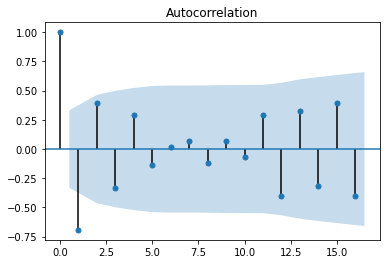

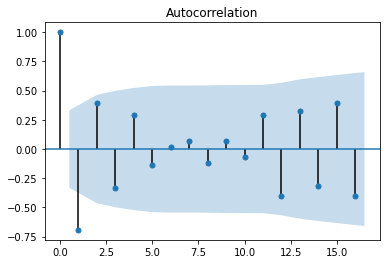

In [52]:
plot_acf(sales_diff)

*We can see here that it is ideally decreasing immediately.. So we can say it as a Stationary which is only used for time series.*

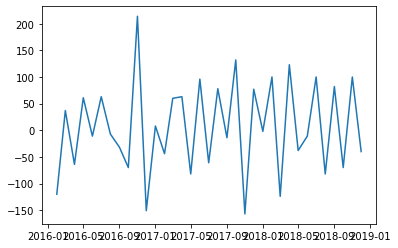

In [66]:
plt.plot(sales_diff)

In [68]:
X = sales.values

X.size

36

In [69]:
(80/100) * 36        80 % of our data i.e X = 28

28.8

In [99]:
train ,test = X[:28],X[28:36]

In [100]:
train.size,test.size

(28, 8)

# Auto Regressive Model

In [101]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [102]:
model_ar = AR(train).fit()

In [103]:
ar_pred = model_ar.predict(start=28,end=35)

ar_pred

array([373.04789169, 456.12359861, 400.43239489, 489.71149948,
       436.83697833, 496.86105144, 474.98565763, 538.44318066])

In [104]:
mean_squared_error(test,ar_pred)

4253.575021232911

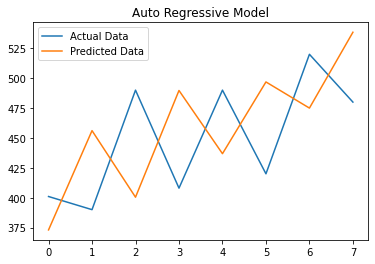

In [112]:
plt.title("Auto Regressive Model")

plt.plot(test,label='Actual Data')

plt.plot(ar_pred,label='Predicted Data')

plt.legend()

`Our predictions looks like almost Same.Its pretty much good.`

`So,lets move on with next model`

# ARIMA MODEL (Auto Regressive Integrated Moving Average)

In [113]:
from statsmodels.tsa.arima_model import ARIMA

In [168]:
model_arima = ARIMA(train,order=(3,1,1)).fit()           # tuple is nothing but (p,d,q) i.e AR,INTEGRATED,MA MODEL Parameters...

# Three is given for p so that it takes values of 3 previous sales..

In [204]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -147.298
Method:                       css-mle   S.D. of innovations             54.628
Date:                Sun, 22 Nov 2020   AIC                            306.596
Time:                        15:27:16   BIC                            314.371
Sample:                             1   HQIC                           308.908
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2099      2.928      2.804      0.010       2.472      13.948
ar.L1.D.y     -0.7297      0.280     -2.607      0.016      -1.278      -0.181
ar.L2.D.y     -0.4180      0.298     -1.400      0.175      -1.003       0.167
ar.L3.D.y     -0.4844      0.187     -2.597      0.016      -0.850      -0.119
ma.L1.D.y     -0.3158      0.311     -1.014      0.322      -0.926       0.295
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1362           -0.0000j            1.1362           -0.5000
AR.2            0.1366           -1.3410j            1.3479           -0.2338
AR.3            0.1366           +1.3410j            1.3479            0.2338
MA.1            3.1667           +0.0000j            3.1667            0.0000
-----------------------------------------------------------------------------
"""

In [169]:
model_arima.forecast(8)              # We not interested in all the data. we want only first array that have 8 test data..

(array([360.21082033, 447.97012351, 378.88887381, 452.39349733,
        406.7278663 , 464.40100559, 427.40569024, 474.02632523]),
 array([54.62768342, 54.6842611 , 57.07824595, 57.07824851, 65.30569112,
        65.60791854, 68.44863665, 68.64102245]),
 array([[253.14252828, 467.27911238],
        [340.79094123, 555.1493058 ],
        [267.01756746, 490.76018016],
        [340.52218594, 564.26480872],
        [278.73106372, 534.72466889],
        [335.81184815, 592.99016302],
        [293.24882761, 561.56255287],
        [339.49239336, 608.5602571 ]]))

In [170]:
arima_pred  = model_arima.forecast(8)[0]

arima_pred

array([360.21082033, 447.97012351, 378.88887381, 452.39349733,
       406.7278663 , 464.40100559, 427.40569024, 474.02632523])

In [172]:
model_arima.aic              # Akaike Information Criteria (AIC) measure for time series. 

# Lower the value that much the model is good..

306.5957237017651

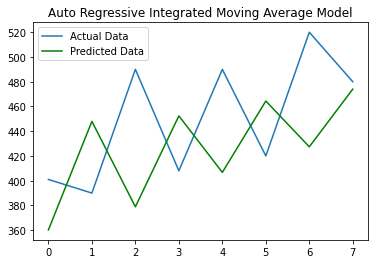

In [173]:
plt.title("Auto Regressive Integrated Moving Average Model")

plt.plot(test,label='Actual Data')

plt.plot(model_arima.forecast(8)[0],label='Predicted Data',color='green')

plt.legend()

In [195]:
pdq = [(i,j,j) for i in range(3) for j in range(3)]

for i in pdq:
  print(i)

(0, 0, 0)
(0, 1, 1)
(0, 2, 2)
(1, 0, 0)
(1, 1, 1)
(1, 2, 2)
(2, 0, 0)
(2, 1, 1)
(2, 2, 2)


In [200]:
import warnings

warnings.filterwarnings('ignore')

In [203]:
for i in pdq:
  try:
    model_arima1 = ARIMA(train,order=i).fit() 
    print("(p,d,q) are ",i,"and aic score is ",model_arima1.aic)   
  except:
    continue


(p,d,q) are  (0, 0, 0) and aic score is  335.08327681905075
(p,d,q) are  (0, 1, 1) and aic score is  308.0082182897029
(p,d,q) are  (1, 0, 0) and aic score is  330.8689624119528
(p,d,q) are  (1, 1, 1) and aic score is  306.85894261817725
(p,d,q) are  (1, 2, 2) and aic score is  299.6134808006369
(p,d,q) are  (2, 0, 0) and aic score is  322.14928731159796
(p,d,q) are  (2, 1, 1) and aic score is  308.72892963045774


We can conclude that (1,2,2) have minimum aic score.So we can take those (p,d,q) values

# Seasonal ARIMA

In [210]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [226]:
sm = SARIMAX(train,order=(3,2,4)).fit()

In [227]:
sm.predict(start=28,end=35)

array([326.86873079, 456.62833815, 412.63890289, 467.37042916,
       408.44322291, 453.78254388, 458.42522622, 504.19827349])

In [228]:
sm.aic

300.68460095031037

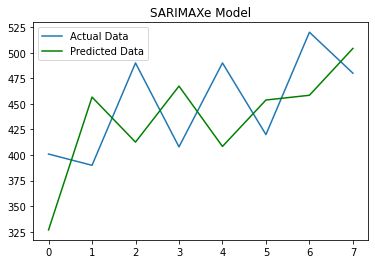

In [229]:
plt.title("SARIMAXe Model")

plt.plot(test,label='Actual Data')

plt.plot(sm.predict(start=28,end=35),label='Predicted Data',color='green')

plt.legend()